In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
class CreateAirlineSimulation():
    
    def __init__(self, demand_set_price=None, demand_exp_factor=None, price_sensitivity_factor=None, 
                 competitiveness_score=None, our_stock=80, comp_stock=80):
        """
        Class is used to simulate the demand for flight tickets.

        Attributes:
            demand_set_price: Starting/opening price which would result in lambda 1 (~1 demand when prices are all equal)
            demand_exp_factor: Exponential factor that increases the price demand every period
            price_sensitivity_factor: How important pricing is in demand for this season
            competitiveness_score: How importance price difference with competitor is for this season
        """
        self.period = 1
        self.our_stock = our_stock
        self.comp_stock = comp_stock
        self.demand_set_price = demand_set_price
        self.demand_exp_factor = demand_exp_factor
        self.price_sensitivity_factor = price_sensitivity_factor
        self.competitiveness_score = competitiveness_score
        self.demand_curve_prices = []
        self._initialize_demand_curve()
    
    def _initialize_demand_curve(self):
        """
        Initialize demand curve and environment characteristics.
        """
        
        if self.demand_set_price is None:
            self.demand_set_price = np.random.normal(50, 10)
            
        if self.demand_exp_factor is None:
            self.demand_exp_factor = np.random.normal(1.005, 0.001)
            
        if self.price_sensitivity_factor is None:
            self.price_sensitivity_factor = np.random.normal(1.1, 0.05)
            
        if self.competitiveness_score is None:
            self.competitiveness_score = np.random.normal(1.1, 0.05)
        
        self.demand_curve_prices = np.array([
            self.exp_increase(self.demand_set_price, self.demand_exp_factor, x) for x in range(1, 101)
        ])
    
    @staticmethod
    def exp_increase(start_point, exp_inc, timestep):
        """
        Calculates exponential increase based on timestep.
        """
        return start_point * exp_inc**(timestep-1)
    
    @staticmethod
    def calculate_lambdas(demand_set_price, our_price, comp_price, price_sensitivity_factor, competitiveness_score):
        """
        Given your price, and the price of competitor, you will pull demand from a certain distribution.
        The distribution is a poisson distribution which uses lambda as input to determine the distribution.

        Lambda must be a relative score depending on:
        Our prices relative to demand curve
        Our price relative to competition
        Price sensitivity of market (price elastivity)
        Competitiveness of the market
        """

        # Set lambda based on price diff with set price
        our_lambda = 1 + (demand_set_price - our_price) / our_price
        comp_lambda = 1 + (demand_set_price - comp_price) / comp_price

        # Adjust for price sensitivity
        if our_price > demand_set_price:
            our_lambda = our_lambda / price_sensitivity_factor
        else:
            our_lambda = our_lambda * price_sensitivity_factor

        if comp_price > demand_set_price:
            comp_lambda = comp_lambda / price_sensitivity_factor
        else:
            comp_lambda = comp_lambda * price_sensitivity_factor

        # Adjust for price difference and how competitive this market is
        if our_price > comp_price:
            our_lambda = our_lambda / (1 + (our_price - comp_price) / comp_price) / competitiveness_score
            comp_lambda = comp_lambda / (1 + (comp_price - our_price) / our_price) * competitiveness_score
        else:
            our_lambda = our_lambda / (1 + (our_price - comp_price) / comp_price) * competitiveness_score
            comp_lambda = comp_lambda / (1 + (comp_price - our_price) / our_price) / competitiveness_score

        return our_lambda, comp_lambda
    
    def simulate_demand(self, our_price, comp_price):
        """
        Use our price and price of competitor to simulate demand
        Checks demand with current stock and returns demand
        """
        # Create lambdas to define the distribution from which the demand will be picked
        our_lambda, comp_lambda = self.calculate_lambdas(
            self.demand_set_price, our_price, comp_price, self.price_sensitivity_factor, self.competitiveness_score
        )
        
        # Pick the actual demand
        our_demand = np.random.poisson(lam=our_lambda, size=1)
        comp_demand = np.random.poisson(lam=comp_lambda, size=1)
        
        # Check if demand can be met, i.e. there is stock left
        if our_demand > self.our_stock:
            our_demand = self.our_stock
            
        if comp_demand > self.comp_stock:
            comp_demand = self.comp_stock
            
        self.update_environment(our_demand, comp_demand)
        
        return our_demand, comp_demand
    
    def update_environment(self, our_demand, comp_demand):
        """
        Update environment variables to be ready for next period simulation.
        """
        
        # reset if simulation finished
        if self.period == 100:
            self.period = 1
            self.our_stock = 80
            self.comp_stock = 80
            self.demand_set_price=None
            self.demand_exp_factor=None
            self.price_sensitivity_factor=None 
            self.competitiveness_score=None
            self._initialize_demand_curve()
        # Update period, stock and set price otherwise
        else:
            self.period += 1
            self.our_stock -= our_demand[0]
            self.comp_stock -= comp_demand[0]
            self.demand_set_price = self.demand_curve_prices[self.period]
    
    
class OurStrategySimulation():
    pass


class CompStrategySimulation():
    pass

In [40]:
simulator = CreateAirlineSimulation()

In [42]:
print(simulator.period, simulator.our_stock, simulator.comp_stock)
print(simulator.demand_set_price, simulator.demand_exp_factor, simulator.price_sensitivity_factor)
simulator.demand_curve_prices

1 80 80
48.50233361023214 1.0056903067181175 1.1547604756179883


array([48.50233361, 48.77832677, 49.05589041, 49.33503347, 49.61576494,
       49.89809386, 50.18202932, 50.46758046, 50.75475647, 51.0435666 ,
       51.33402015, 51.62612647, 51.91989497, 52.21533509, 52.51245637,
       52.81126835, 53.11178066, 53.41400299, 53.71794505, 54.02361663,
       54.33102758, 54.64018779, 54.95110722, 55.26379587, 55.57826382,
       55.89452119, 56.21257816, 56.53244497, 56.85413192, 57.17764937,
       57.50300773, 57.83021748, 58.15928916, 58.49023335, 58.82306072,
       59.15778198, 59.4944079 , 59.83294933, 60.17341716, 60.51582236,
       60.86017595, 61.20648902, 61.55477272, 61.90503826, 62.25729691,
       62.61156003, 62.96783901, 63.32614532, 63.68649051, 64.04888618,
       64.41334399, 64.77987567, 65.14849303, 65.51920794, 65.89203233,
       66.2669782 , 66.64405763, 67.02328276, 67.4046658 , 67.78821902,
       68.17395478, 68.56188549, 68.95202365, 69.34438181, 69.73897261,
       70.13580876, 70.53490302, 70.93626826, 71.33991738, 71.74

In [44]:
simulator.simulate_demand(our_price=50, comp_price=40)

(array([1]), array([6]))

In [45]:
print(simulator.period, simulator.our_stock, simulator.comp_stock)
print(simulator.demand_set_price)

2 79 74
49.05589040550835


In [46]:
simulator.simulate_demand(our_price=45, comp_price=42)

(array([0]), array([2]))

In [47]:
print(simulator.period, simulator.our_stock, simulator.comp_stock)
print(simulator.demand_set_price)

3 79 72
49.33503346824604


In [48]:
simulator.simulate_demand(our_price=45, comp_price=48)

(array([2]), array([1]))

In [49]:
print(simulator.period, simulator.our_stock, simulator.comp_stock)
print(simulator.demand_set_price)

4 77 71
49.61576494062896


### Visualizations

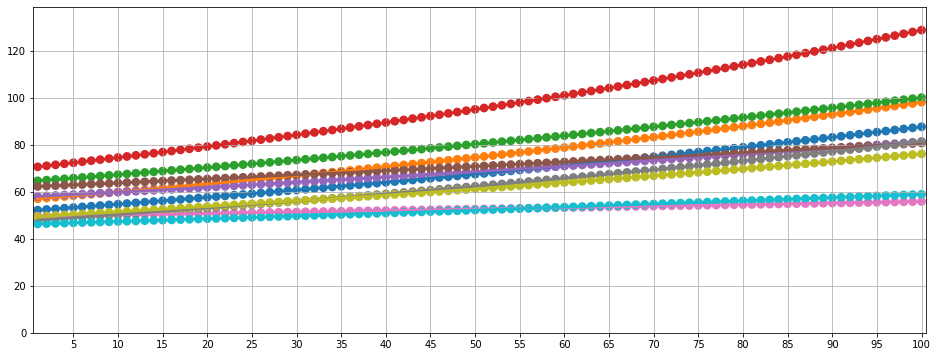

In [52]:
# Example demand curves
plt.figure(figsize=(16,6))
timesteps = [x for x in range(1, 101)]

all_prices = np.array([])

for i in range(10):
    demand_set_price = np.random.normal(50, 10)
    demand_exp_factor = np.random.normal(1.005, 0.001)
    demand_prices = np.array([
        CreateAirlineSimulation.exp_increase(demand_set_price, demand_exp_factor, x) for x in range(1, 101)]
    )
    all_prices = np.append(all_prices, demand_prices)
    
    sns.pointplot(x=timesteps, y=demand_prices, color=sns.color_palette()[i])

plt.xticks([x for x in range(4, 101, 5)])
plt.ylim(0, np.max(all_prices) + 10)
plt.grid()

In [54]:
# Were on demand with price, comp little higher in price
demand_set_price = 50  # Randomly sample price starting point
demand_exp_factor = 1.01  # At every price point increase the price, with x
my_price = 50
comp_price = 52

price_sensitivity_factor = 1  # Some routes are more price sensitive than others
competitiveness_score = 1  # In some scenarios price difference with competitor is more important than for others

my_lambda, comp_lambda = CreateAirlineSimulation.calculate_lambdas(
    demand_set_price, my_price, comp_price, price_sensitivity_factor, competitiveness_score
)

print(f'My lambda: {round(my_lambda, 3)}')
print(f'Competors lambda: {round(comp_lambda, 3)}')

My lambda: 1.04
Competors lambda: 0.925


In [55]:
# Price diff is bigger
demand_set_price = 50  # Randomly sample price starting point
demand_exp_factor = 1.01  # At every price point increase the price, with x
my_price = 45
comp_price = 55

price_sensitivity_factor = 1  # Some routes are more price sensitive than others
competitiveness_score = 1  # In some scenarios price difference with competitor is more important than for others

my_lambda, comp_lambda = CreateAirlineSimulation.calculate_lambdas(
    demand_set_price, my_price, comp_price, price_sensitivity_factor, competitiveness_score
)

print(f'My lambda: {round(my_lambda, 3)}')
print(f'Competors lambda: {round(comp_lambda, 3)}')

My lambda: 1.358
Competors lambda: 0.744


In [56]:
# Both underpricing, most demand goes to us
demand_set_price = 50  # Randomly sample price starting point
demand_exp_factor = 1.01  # At every price point increase the price, with x
my_price = 40
comp_price = 45

price_sensitivity_factor = 1  # Some routes are more price sensitive than others
competitiveness_score = 1  # In some scenarios price difference with competitor is more important than for others

my_lambda, comp_lambda = CreateAirlineSimulation.calculate_lambdas(
    demand_set_price, my_price, comp_price, price_sensitivity_factor, competitiveness_score
)

print(f'My lambda: {round(my_lambda, 3)}')
print(f'Competors lambda: {round(comp_lambda, 3)}')

My lambda: 1.406
Competors lambda: 0.988


In [57]:
# Higher price sensitivity and competitiveness
demand_set_price = 50  # Randomly sample price starting point
demand_exp_factor = 1.01  # At every price point increase the price, with x
my_price = 45
comp_price = 55

price_sensitivity_factor = 1.2  # Some routes are more price sensitive than others
competitiveness_score = 1.1  # In some scenarios price difference with competitor is more important than for others

my_lambda, comp_lambda = CreateAirlineSimulation.calculate_lambdas(
    demand_set_price, my_price, comp_price, price_sensitivity_factor, competitiveness_score
)

print(f'My lambda: {round(my_lambda, 3)}')
print(f'Competors lambda: {round(comp_lambda, 3)}')

My lambda: 1.793
Competors lambda: 0.563


In [58]:
# Lower price sensitivity and competitiveness (can maybe make more with higher prices at some point)
demand_set_price = 50  # Randomly sample price starting point
demand_exp_factor = 1.01  # At every price point increase the price, with x
my_price = 45
comp_price = 55

price_sensitivity_factor = 0.9  # Some routes are more price sensitive than others
competitiveness_score = 0.9  # In some scenarios price difference with competitor is more important than for others

my_lambda, comp_lambda = CreateAirlineSimulation.calculate_lambdas(
    demand_set_price, my_price, comp_price, price_sensitivity_factor, competitiveness_score
)

print(f'My lambda: {round(my_lambda, 3)}')
print(f'Competors lambda: {round(comp_lambda, 3)}')

My lambda: 1.1
Competors lambda: 0.918


In [ ]:
# Based on lambda you pull from poisson distribution to create randomness
# But randomness is different depending on lambda, so higher lambda will overall result in more sales

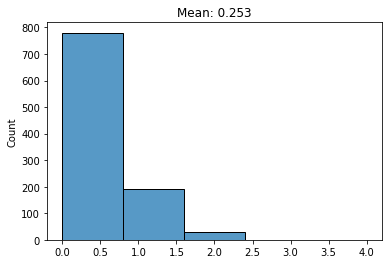

In [59]:
testdist = np.random.poisson(lam=0.25, size=1000)
plt.title(f'Mean: {np.mean(testdist)}')
_ = sns.histplot(testdist, bins=len(np.unique(testdist)))

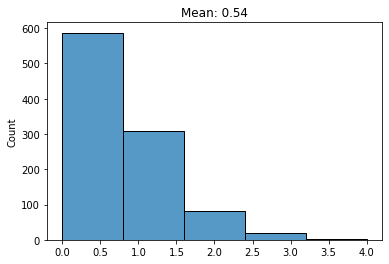

In [60]:
testdist = np.random.poisson(lam=0.5, size=1000)
plt.title(f'Mean: {np.mean(testdist)}')
_ = sns.histplot(testdist, bins=len(np.unique(testdist)))

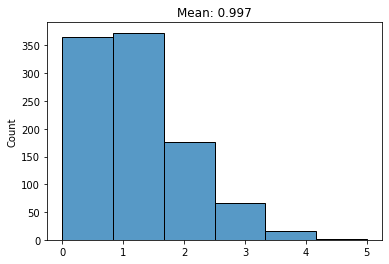

In [61]:
testdist = np.random.poisson(lam=1, size=1000)
plt.title(f'Mean: {np.mean(testdist)}')
_ = sns.histplot(testdist, bins=len(np.unique(testdist)))

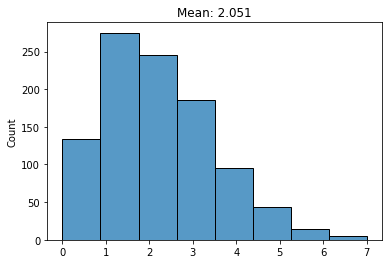

In [62]:
testdist = np.random.poisson(lam=2, size=1000)
plt.title(f'Mean: {np.mean(testdist)}')
_ = sns.histplot(testdist, bins=len(np.unique(testdist)))

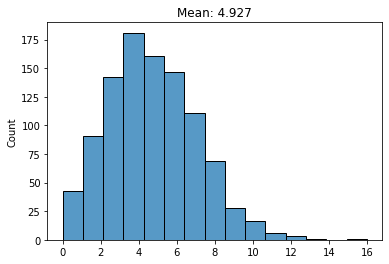

In [63]:
testdist = np.random.poisson(lam=5, size=1000)
plt.title(f'Mean: {np.mean(testdist)}')
_ = sns.histplot(testdist, bins=len(np.unique(testdist)))

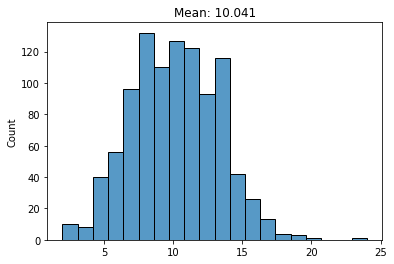

In [64]:
testdist = np.random.poisson(lam=10, size=1000)
plt.title(f'Mean: {np.mean(testdist)}')
_ = sns.histplot(testdist, bins=len(np.unique(testdist)))

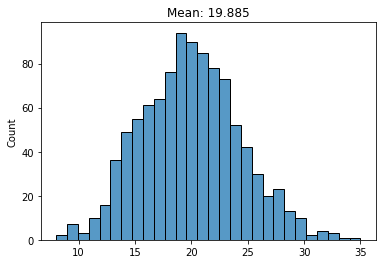

In [65]:
testdist = np.random.poisson(lam=20, size=1000)
plt.title(f'Mean: {np.mean(testdist)}')
_ = sns.histplot(testdist, bins=len(np.unique(testdist)))